# Datasets:- https://www.kaggle.com/datasets/camnugent/california-housing-prices

# STEP 1: IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: LOAD DATASET

In [ ]:
df = pd.read_csv("./Datasets/California_Housing.csv")

In [ ]:
df.shape

(20640, 10)

# STEP 3: BASIC EDA

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing Percentage": missing_percentage
})

print(missing_df[missing_df["Missing Count"] > 0])

                Missing Count  Missing Percentage
total_bedrooms            207            1.002907


In [ ]:
# Check for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

if len(categorical_columns) > 0:
  print(f"Categorical Columns is Found: {list(categorical_columns)}")
  print("Note: XGBoost can handle categorical features with proper encoding")

Categorical Columns is Found: ['ocean_proximity']
Note: XGBoost can handle categorical features with proper encoding


In [ ]:
# correlation with target

numerical_cols = df.select_dtypes(include=['float64','int64'])
correlation = numerical_cols.corr()['median_house_value'].sort_values(ascending=False)
print(correlation)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


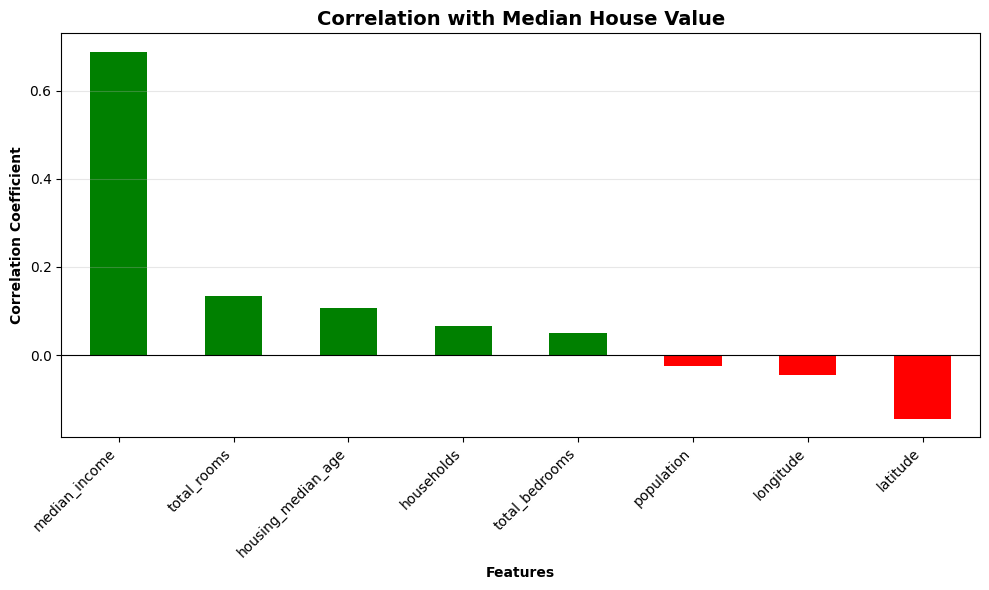

In [ ]:
# Visualize correlation
plt.figure(figsize=(10, 6))
correlation.drop('median_house_value').plot(kind='bar',
                                             color=['green' if x > 0 else 'red'
                                                    for x in correlation.drop('median_house_value')])
plt.title("Correlation with Median House Value", fontweight='bold', fontsize=14)
plt.ylabel('Correlation Coefficient', fontweight='bold')
plt.xlabel('Features', fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# STEP 4: DATA PREPROCESSING

In [ ]:
# check missing values in dataset

df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
# Separate features and target (drop categorical 'ocean_proximity' for now)

X = df.drop(['median_house_value', 'ocean_proximity'], axis=1, errors='ignore')
y = df['median_house_value']

In [ ]:
X.shape

(20640, 8)

In [ ]:
y.shape

(20640,)

# STEP 5: TRAIN-TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


In [ ]:
X_train.shape

(16512, 8)

In [ ]:
X_test.shape

(4128, 8)

In [ ]:
y_train.shape

(16512,)

In [ ]:
y_test.shape

(4128,)

# STEP 6: FEATURE SCALING (OPTIONAL FOR XGBOOST)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# STEP 7: XGBOOST WITH DEFAULT PARAMETERS

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_default = xgb.XGBRegressor(
    objective='reg:squarederror', # Regression Task
    random_state=42,
    n_jobs=-1 # use all cpu cores
)

In [ ]:
xgb_default.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
# Predictions

y_pred_default = xgb_default.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# evaluatation

default_r2 = r2_score(y_test, y_pred_default)
default_mae = mean_absolute_error(y_test, y_pred_default)
default_mse = mean_squared_error(y_test, y_pred_default)
default_rmse = np.sqrt(mean_squared_error(y_test, y_pred_default))

print(f"Default R2 score: {default_r2}")
print(f"Default Mean Squared Error: {default_mse}")
print(f"Default Mean Absolute Error: {default_mae}")
print(f"Default RMSE: {default_rmse}")

Default R2 score: 0.8259572860046935
Default Mean Squared Error: 2280671350.1686273
Default Mean Absolute Error: 31720.746273780052
Default RMSE: 47756.374968883756


# XGBOOST WITH DEFAULT PARAMETERS ths time take scaler data

In [ ]:
import xgboost as xgb

In [ ]:
scaler_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=9, n_jobs=-1)

In [ ]:
scaler_xgb.fit(X_train_scaler, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
scaler_xgb.score(X_test_scaler, y_test)

0.818684920508665

In [ ]:
y_pred_scaler = scaler_xgb.predict(X_test_scaler)

In [ ]:
# evaluatation

scaler_r2 = r2_score(y_test, y_pred_scaler)
scaler_mae = mean_absolute_error(y_test, y_pred_scaler)
scaler_mse = mean_squared_error(y_test, y_pred_scaler)
scaler_rmse = np.sqrt(mean_squared_error(y_test, y_pred_scaler))

print(f"scaler R2 score: {scaler_r2}")
print(f"scaler Mean Squared Error: {scaler_mae}")
print(f"scaler Mean Absolute Error: {scaler_mse}")
print(f"scaler RMSE: {scaler_rmse}")

scaler R2 score: 0.818684920508665
scaler Mean Squared Error: 32144.469190967175
scaler Mean Absolute Error: 2375969080.559078
scaler RMSE: 48743.913266776995


# STEP 8: XGBOOST WITH HYPER PERAMETERS PARAMETERS

In [ ]:
import xgboost as xgb

In [ ]:
hyper_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=9, n_jobs=-1)

In [ ]:
hyper_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred_hyper = hyper_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# evaluatation

hyper_r2 = r2_score(y_test, y_pred_hyper)
hyper_mae = mean_absolute_error(y_test, y_pred_hyper)
hyper_mse = mean_squared_error(y_test, y_pred_hyper)
hyper_rmse = np.sqrt(mean_squared_error(y_test, y_pred_hyper))

print(f"hyper R2 score: {hyper_r2}")
print(f"hyper Mean Squared Error: {hyper_mae}")
print(f"hyper Mean Absolute Error: {hyper_mse}")
print(f"hyper RMSE: {hyper_rmse}")

hyper R2 score: 0.818684920508665
hyper Mean Squared Error: 32144.469190967175
hyper Mean Absolute Error: 2375969080.559078
hyper RMSE: 48743.913266776995


# STEP 9: FEATURE IMPORTANCE ANALYSIS

In [ ]:
# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_default.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

              Feature  Importance
7       median_income    0.551149
1            latitude    0.121647
0           longitude    0.106822
2  housing_median_age    0.079305
4      total_bedrooms    0.046585
5          population    0.042515
6          households    0.030713
3         total_rooms    0.021263


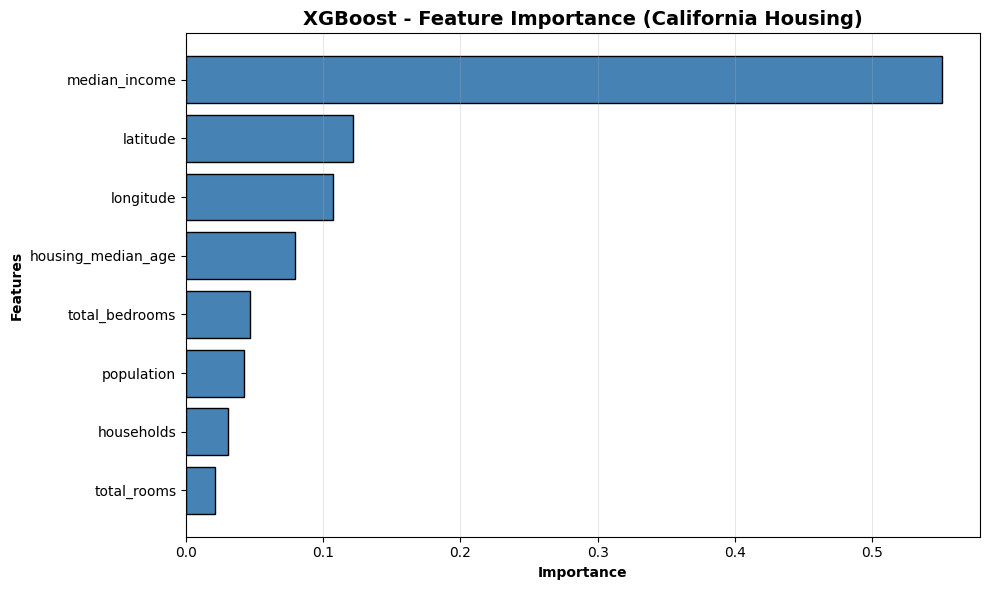

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'],
         color='steelblue', edgecolor='black')
plt.xlabel('Importance', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.title('XGBoost - Feature Importance (California Housing)',
          fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# STEP 10: CROSS-VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score = cross_val_score(xgb_default, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

print(f"CV R² Scores: {cv_score}")
print(f"Mean CV R²: {cv_score.mean():.4f} (+/- {cv_score.std():.4f})")

CV R² Scores: [0.82821429 0.81457664 0.82653332 0.82370551 0.81922814]
Mean CV R²: 0.8225 (+/- 0.0050)


# STEP 11: HYPERPARAMETER TUNING WITH RANDOMIZEDSEARCHCV

In [ ]:
from scipy.stats import uniform, randint

In [ ]:
# Define parameter distributions (best practices from AWS/XGBoost docs)

param_distributions = {
    'n_estimators': [100, 200, 300, 500,1000],
    'learning_rate': uniform(0.01, 0.29),  # 0.01 to 0.3
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 8),
    'subsample': uniform(0.6, 0.4),  # 0.6 to 1.0
    'colsample_bytree': uniform(0.6, 0.4),  # 0.6 to 1.0
    'gamma': uniform(0, 5),  # 0 to 5
    'reg_alpha': [0, 0.01, 0.1, 1, 10],  # L1 regularization
    'reg_lambda': [0, 0.01, 0.1, 1, 10]  # L2 regularization
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
print(f"\nRunning RandomizedSearchCV (30 iterations)...")
print("Expected time: 3-5 minutes...")

random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror',
                                random_state=42, n_jobs=-1),
    param_distributions=param_distributions,
    n_iter=30,  # 30 random combinations
    cv=5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("\n---Best Hyperparameter Found---")

best_param = random_search.best_params_

for param, value in best_param.items():
  print(f"{param}: {value}")

print(f"Best CV R2 Score: {random_search.best_score_:.4f}")


Running RandomizedSearchCV (30 iterations)...
Expected time: 3-5 minutes...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

---Best Hyperparameter Found---
colsample_bytree: 0.6259568988435926
gamma: 1.2695770696717235
learning_rate: 0.08159405822319434
max_depth: 9
min_child_weight: 2
n_estimators: 300
reg_alpha: 0
reg_lambda: 10
subsample: 0.713936197750987
Best CV R2 Score: 0.8424


In [ ]:
# Predict with best model

y_pred_tuned = random_search.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print("\n--- Tuned XGBoost Performance (Test Set) ---")
print(f"R² Score: {tuned_r2:.4f}")
print(f"MAE: ${tuned_mae:,.2f}")
print(f"RMSE: ${tuned_rmse:,.2f}")


--- Tuned XGBoost Performance (Test Set) ---
R² Score: 0.8444
MAE: $29,602.77
RMSE: $45,162.06


# STEP 12: EARLY STOPPING DEMONSTRATION

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print("\nTraining XGBoost with early stopping...")

# Split training data for validation

X_train_es, X_val_es, y_train_es, y_val_es = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

xgb_early_stop = xgb.XGBRegressor(
    **best_param,
    # n_estimators=1000,  # Large number
    early_stopping_rounds=20,  # Stop if no improvement for 20 rounds
    random_state=42,
    n_jobs=-1
)

xgb_early_stop.fit(
    X_train_es, y_train_es,
    eval_set=[(X_val_es, y_val_es)],
    verbose=False
)

print(f"✓ Best iteration: {xgb_early_stop.best_iteration}")
print(f"✓ Stopped early at: {xgb_early_stop.n_estimators} trees")

y_pred_early = xgb_early_stop.predict(X_test)
early_r2 = r2_score(y_test, y_pred_early)
early_mae = mean_absolute_error(y_test, y_pred_early)
early_rmse = np.sqrt(mean_squared_error(y_test, y_pred_early))

print(f"\nR² Score: {early_r2:.4f}")
print(f"MAE: ${early_mae:,.2f}")
print(f"RMSE: ${early_rmse:,.2f}")


Training XGBoost with early stopping...
✓ Best iteration: 249
✓ Stopped early at: 300 trees

R² Score: 0.8380
MAE: $30,600.85
RMSE: $46,073.61


# STEP 13: MODEL COMPARISON

In [ ]:
comparison = pd.DataFrame({
    'Model': ['XGBoost (Default)', 'XGBoost (Tuned)', 'XGBoost (Early Stop)'],
    'R² Score': [default_r2, tuned_r2, early_r2],
    'MAE': [default_mae, tuned_mae, early_mae],
    'RMSE': [default_rmse, tuned_rmse, early_rmse]
})

print("\n")
print(comparison.to_string(index=False))

best_idx = comparison['R² Score'].idxmax()
print(f"\n✓ Best Model: {comparison.loc[best_idx, 'Model']}")
print(f"✓ Best R² Score: {comparison.loc[best_idx, 'R² Score']:.4f}")

improvement = ((tuned_r2 - default_r2) / default_r2) * 100
print(f"✓ Improvement from tuning: {improvement:.2f}%")



               Model  R² Score          MAE         RMSE
   XGBoost (Default)  0.825957 31720.746274 47756.374969
     XGBoost (Tuned)  0.844353 29602.771987 45162.061178
XGBoost (Early Stop)  0.838006 30600.852708 46073.610869

✓ Best Model: XGBoost (Tuned)
✓ Best R² Score: 0.8444
✓ Improvement from tuning: 2.23%
